<a href="https://colab.research.google.com/github/farielshafee2018/gene-data-using-unsupervised-learning/blob/main/Copy_of_shaf_icmr_gene_data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We analyze the ICMR cancer gene data using unsupervised clustering after performing PCA analysis.  The data file is downloaded into google drive from kaggle first.

First, add google drive to google colab to get the data file


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/datafiles/icmr_gene_data.csv')
data.head()

Mounted at /content/drive


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


Now add the relevant libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Get basic information about data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [ ]:
data.size

16446132

In [ ]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


get rid of the first column

In [ ]:
data = data.drop(data.columns[0], axis=1)
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


check for null values

check for null data

In [ ]:
is_null = data.isnull()
is_null.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
gene_0,0
gene_1,0
gene_2,0
gene_3,0
gene_4,0
...,...
gene_20526,0
gene_20527,0
gene_20528,0
gene_20529,0


We create a heatmap plot for the first ten rows of genes with the samples to get a rough idea

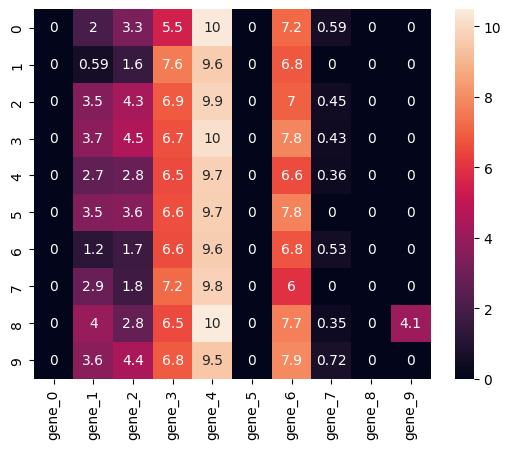

In [ ]:
sns.heatmap(data.iloc[0:10,0:10], annot = True)
plt.show()

We plot how the first five rows vary in the five samples using a histogram

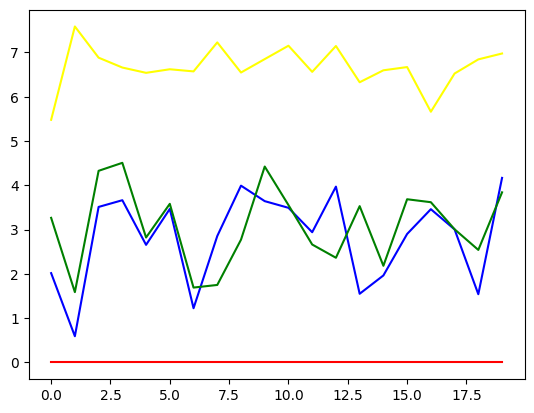

In [ ]:
subdata = data.iloc[0:20, 0:5]

plt.plot(subdata.iloc[:,0], color = 'red')
plt.plot(subdata.iloc[:,1], color = 'blue')
plt.plot(subdata.iloc[:,2], color = 'green')
plt.plot(subdata.iloc[:,3], color = 'yellow')


make a scatterplot showing the first hundred genes in the first two samples

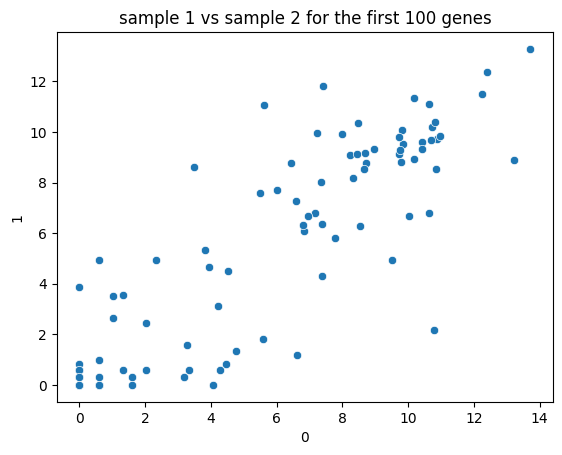

In [ ]:
subset_data = data.iloc[0:10,0:100]
sns.scatterplot(x = subset_data.iloc[0,:], y = subset_data.iloc[1,:])
plt.title('sample 1 vs sample 2 for the first 100 genes')
plt.show()

Now we do a scatterplot of the first hundred genes in samples 3 and 4

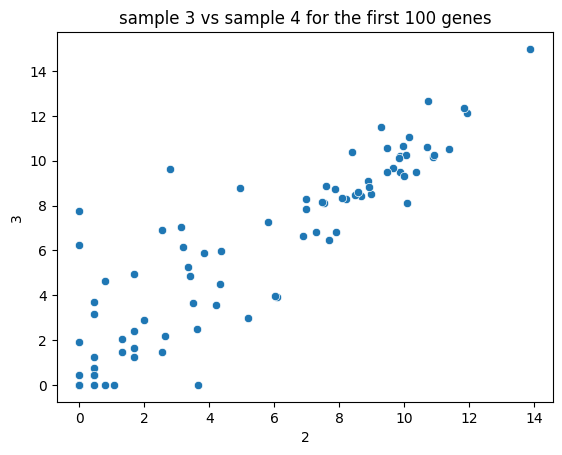

In [ ]:
sns.scatterplot(x = subset_data.iloc[2,:], y = subset_data.iloc[3,:])
plt.title('sample 3 vs sample 4 for the first 100 genes')
plt.show()

A similar plot for samples 5 and 1

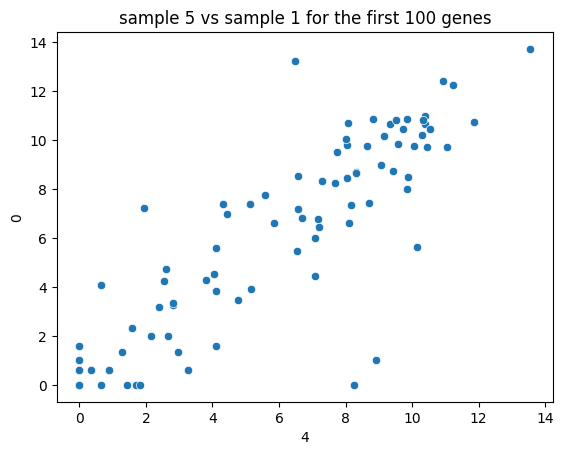

In [ ]:
sns.scatterplot(x = subset_data.iloc[4,:], y = subset_data.iloc[0,:])
plt.title('sample 5 vs sample 1 for the first 100 genes')

plt.show()

Transform and fit data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data1 = scaler.transform(data)

In [ ]:
print(data1)

Perform a PCR analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
new_gene= pca.fit_transform(data1)
df = pd.DataFrame(data=new_gene)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-57.446987,-95.410981,74.301543,12.166781,-7.981831,-36.157573,-7.668542,19.951444,0.142216,-3.035239,...,0.938195,-1.866121,2.307215,-6.616431,-8.687720,2.231896,2.819366,-7.425369,-9.119352,6.150928
1,-16.919430,-0.732470,-64.072900,2.095308,25.426430,-27.784178,-16.132765,-17.031383,-22.023873,27.923308,...,-14.073694,9.648024,-11.491813,13.915404,-8.042811,-11.531335,3.873100,7.429573,10.341405,-5.994893
2,-70.345218,19.303327,20.488240,-48.102893,-24.437757,-17.462510,20.706772,-47.626817,-28.647648,12.784682,...,3.261385,-2.661855,-9.589993,-12.590736,15.945238,8.026856,-8.703670,-16.195265,-2.064816,-1.249632
3,-49.161591,9.227586,61.243770,-37.805744,-1.038889,-23.240002,-4.801039,-21.554809,-15.375066,12.881509,...,-1.336688,-3.542512,1.289001,9.973407,3.001636,-6.359436,5.752581,3.092135,-2.709219,1.639922
4,-18.132534,51.327797,16.598116,17.699201,-26.389130,1.551573,-6.266101,12.336677,-4.233838,-28.804475,...,1.484253,-0.857159,-10.194492,-5.484388,4.783406,-1.070762,-0.070276,-6.017897,-0.805358,-0.816515


Create a plot showing the first ten genes in the first two columns

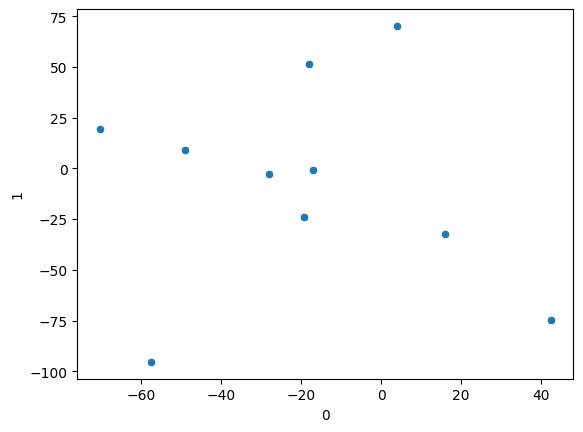

In [ ]:
subset_data = df.iloc[0:10,0:4]
sns.scatterplot(x = subset_data[0], y = subset_data[1])
plt.show()

comment:  It appears that only the first two components are signifiant.  Perhaps, the final two rows can be dropped.  However, we keep them here.

Let's perform a k means clustering.  Test on cluster size from one to ten.

In [ ]:
from sklearn.cluster import KMeans
iner = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(df)
    iner.append(kmeans.inertia_)


plot the inertia to find the optimal cluster number

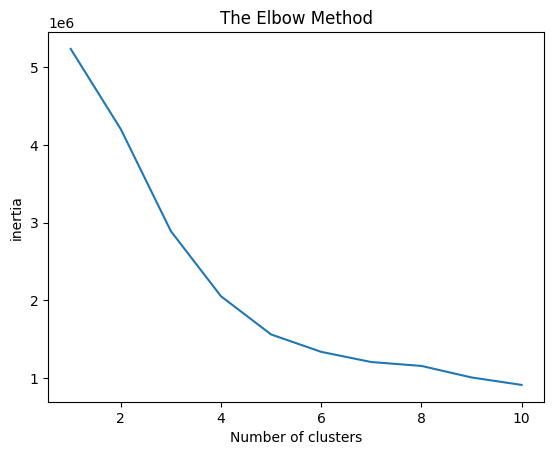

In [ ]:
plt.plot(range(1, 11), iner)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
df.head()

,0,1,2,3
0,-57.446987,-95.410981,74.301543,12.166788
1,-16.919430,-0.732470,-64.072899,2.095296
2,-70.345218,19.303327,20.488241,-48.102904
3,-49.161591,9.227586,61.243770,-37.805745
4,-18.132534,51.327797,16.598116,17.699194


Do a scatter plot for five clusters

Make a plot of the prominent two components

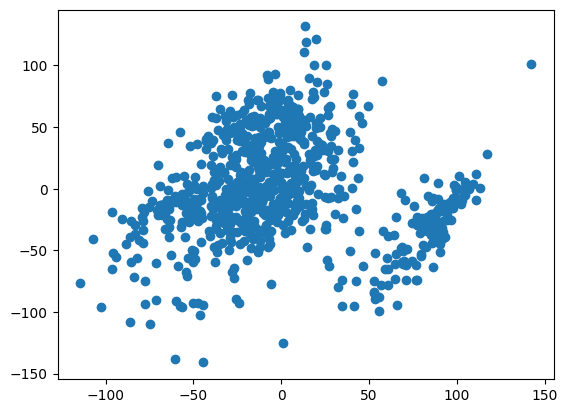

In [ ]:
plt.scatter(df[0], df[1])
plt.show()

find k mean for cluster = 6

In [ ]:
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([3, 1, 3, 3, 0, 3, 2, 3, 0, 3, 0, 4, 3, 1, 0, 0, 1, 4, 4, 3, 0, 4,
       1, 1, 4, 1, 5, 0, 1, 0, 0, 0, 4, 1, 3, 0, 4, 1, 1, 1, 4, 3, 3, 2,
       4, 0, 3, 5, 0, 1, 0, 1, 0, 3, 5, 1, 0, 5, 2, 0, 1, 0, 0, 1, 3, 5,
       1, 3, 4, 1, 4, 1, 1, 0, 0, 1, 0, 2, 3, 5, 0, 3, 0, 0, 3, 3, 0, 1,
       2, 1, 3, 3, 0, 1, 0, 3, 5, 0, 3, 1, 0, 4, 0, 2, 1, 4, 1, 5, 1, 0,
       3, 0, 1, 3, 0, 4, 4, 4, 0, 0, 1, 4, 1, 0, 3, 3, 3, 0, 4, 0, 5, 1,
       5, 1, 0, 2, 2, 0, 2, 5, 0, 3, 0, 2, 0, 5, 3, 0, 1, 1, 0, 1, 0, 0,
       4, 0, 0, 3, 3, 1, 3, 0, 4, 1, 3, 1, 5, 2, 1, 0, 4, 1, 0, 1, 0, 1,
       1, 3, 0, 4, 5, 4, 0, 3, 3, 3, 1, 1, 0, 1, 1, 4, 1, 3, 1, 0, 1, 0,
       1, 1, 0, 4, 4, 4, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 0, 0, 0, 1, 1,
       4, 1, 4, 4, 1, 0, 4, 3, 0, 1, 1, 3, 5, 1, 4, 3, 4, 5, 1, 4, 2, 0,
       3, 1, 1, 1, 4, 0, 0, 5, 0, 3, 1, 0, 3, 4, 3, 3, 3, 0, 5, 5, 0, 5,
       5, 3, 0, 5, 0, 4, 2, 0, 5, 3, 2, 3, 0, 0, 4, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 2, 4, 4, 4, 1, 0, 0, 4, 0, 0, 1, 3, 1,

In [ ]:
df.head()

,0,1,2,3
0,-57.446987,-95.410981,74.301543,12.166788
1,-16.919430,-0.732470,-64.072899,2.095296
2,-70.345218,19.303327,20.488241,-48.102904
3,-49.161591,9.227586,61.243770,-37.805745
4,-18.132534,51.327797,16.598116,17.699194


find the predicted values

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


,0,1,2,3,5,4
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


find centers

In [ ]:
centers = kmeans.cluster_centers_
print('cluster centers = ', centers)

cluster centers =  [[2. 5. 0. 4. 3. 1.]
 [2. 5. 0. 4. 3. 1.]
 [2. 5. 0. 4. 3. 1.]
 [2. 5. 0. 4. 3. 1.]
 [2. 5. 0. 4. 3. 1.]
 [2. 5. 0. 4. 3. 1.]]


find y_pred using iloc in order to make the scatterplot using pandas

In [ ]:
x = df.iloc[:,:].values


make prediction

In [ ]:
km = KMeans(n_clusters=8)
y_pred = km.fit_predict(x)
y_pred

array([7, 4, 2, 2, 1, 2, 0, 2, 1, 2, 1, 6, 2, 7, 1, 1, 4, 6, 6, 2, 1, 6,
       4, 4, 3, 4, 5, 1, 4, 1, 1, 1, 6, 7, 2, 1, 6, 4, 4, 7, 6, 2, 2, 0,
       6, 1, 7, 5, 1, 4, 1, 4, 4, 2, 5, 4, 1, 5, 0, 1, 4, 4, 1, 4, 2, 5,
       4, 2, 6, 4, 6, 4, 7, 4, 1, 4, 1, 7, 2, 5, 1, 2, 1, 1, 7, 2, 1, 4,
       0, 4, 2, 2, 1, 7, 1, 2, 5, 1, 2, 4, 1, 6, 1, 0, 4, 6, 4, 5, 4, 4,
       7, 1, 4, 2, 1, 6, 6, 6, 1, 1, 4, 6, 4, 1, 2, 2, 2, 1, 6, 4, 5, 4,
       5, 4, 1, 0, 0, 1, 0, 5, 1, 2, 1, 0, 1, 5, 7, 1, 4, 4, 4, 4, 1, 1,
       4, 1, 1, 2, 2, 4, 7, 4, 6, 4, 2, 4, 5, 0, 4, 1, 6, 4, 1, 4, 1, 7,
       4, 2, 1, 6, 5, 6, 1, 2, 2, 2, 4, 4, 1, 4, 4, 6, 7, 2, 4, 1, 7, 1,
       4, 4, 1, 6, 6, 6, 0, 2, 7, 2, 4, 4, 4, 1, 2, 4, 2, 1, 1, 1, 4, 4,
       6, 4, 6, 6, 4, 1, 6, 2, 1, 4, 7, 2, 5, 7, 6, 2, 6, 5, 4, 6, 0, 4,
       2, 4, 4, 4, 6, 1, 4, 5, 1, 2, 4, 1, 2, 6, 7, 2, 2, 1, 5, 5, 4, 5,
       5, 2, 4, 5, 1, 6, 0, 1, 5, 7, 0, 2, 1, 1, 6, 1, 1, 1, 7, 4, 4, 1,
       1, 1, 0, 6, 6, 6, 7, 1, 1, 6, 1, 1, 4, 2, 4,

make a scatterplot

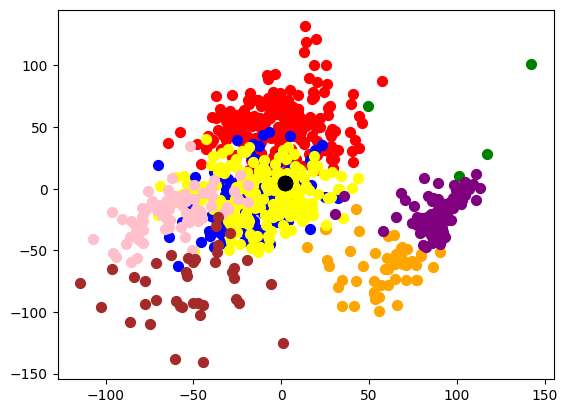

In [ ]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], s=50, c='orange')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1], s=50, c='red')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1], s=50, c='blue')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1], s=50, c='green')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1], s=50, c='yellow')
plt.scatter(x[y_pred==5,0],x[y_pred==5,1], s=50, c='pink')
plt.scatter(x[y_pred==6,0],x[y_pred==6,1], s=50, c='purple')
plt.scatter(x[y_pred==7,0],x[y_pred==7,1], s=50, c='brown')
plt.scatter(centers[:,0], centers[:,1], s=100, c='black')

try only two clusters

In [ ]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

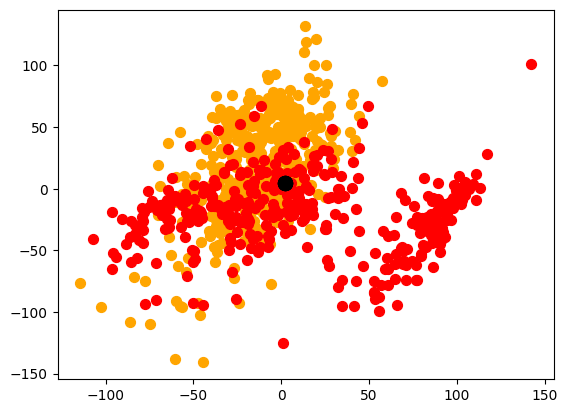

In [ ]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=50, c='orange')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=50, c='red')
plt.scatter(centers[:,0], centers[:,1], s=100, c='black')

now redo for two pca components

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_gene= pca.fit_transform(data1)
df = pd.DataFrame(data=new_gene)

df.head()

,0,1
0,-57.446987,-95.410981
1,-16.919430,-0.732470
2,-70.345218,19.303327
3,-49.161591,9.227587
4,-18.132534,51.327796


In [ ]:
from sklearn.cluster import KMeans
iner = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(df)
    iner.append(kmeans.inertia_)


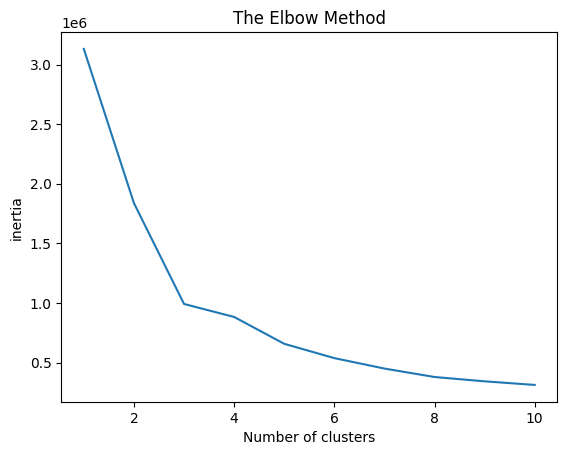

In [ ]:
plt.plot(range(1, 11), iner)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

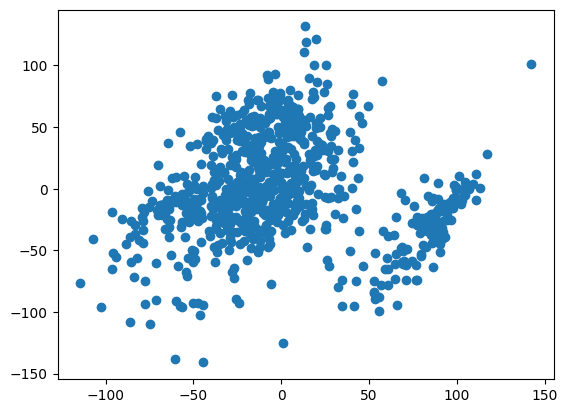

In [ ]:
plt.scatter(df[0], df[1])
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([3, 0, 3, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 3, 1, 1, 0, 2, 2, 0, 1, 0,
       0, 3, 2, 0, 3, 1, 0, 1, 1, 1, 2, 3, 3, 1, 2, 0, 0, 3, 2, 0, 0, 2,
       2, 1, 3, 3, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 2, 0, 0, 0, 1, 0, 0, 3,
       0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 1, 3, 0, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 3, 0, 1,
       3, 1, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 3, 1, 2, 1, 3, 3,
       3, 0, 1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 1, 3, 3, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 3, 0, 3, 0, 2, 0, 0, 0, 3, 2, 0, 1, 2, 0, 1, 0, 1, 3,
       0, 0, 0, 2, 3, 2, 1, 0, 3, 0, 0, 0, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1,
       3, 0, 1, 2, 2, 2, 2, 1, 3, 3, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 0,
       2, 0, 2, 2, 0, 1, 2, 3, 1, 0, 3, 1, 3, 3, 2, 0, 2, 3, 0, 2, 2, 1,
       3, 0, 0, 0, 2, 1, 1, 3, 1, 3, 0, 1, 0, 2, 3, 0, 0, 1, 0, 3, 1, 3,
       3, 3, 1, 1, 1, 2, 2, 1, 3, 3, 2, 0, 1, 1, 2, 1, 1, 1, 3, 3, 0, 1,
       1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 0, 0, 0,

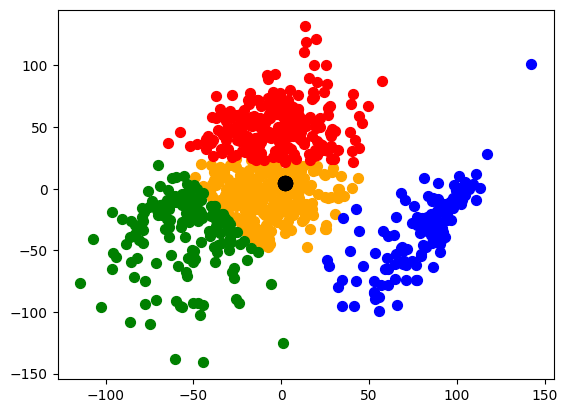

In [ ]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=50, c='orange')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=50, c='red')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s=50, c='blue')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1], s=50, c='green')
plt.scatter(centers[:,0], centers[:,1], s=100, c='black')

In [ ]:
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([3, 2, 5, 5, 1, 5, 0, 2, 4, 5, 1, 0, 2, 3, 1, 4, 2, 0, 0, 5, 4, 2,
       2, 5, 0, 2, 5, 1, 1, 1, 1, 4, 0, 3, 5, 1, 0, 2, 5, 3, 0, 5, 2, 0,
       0, 4, 3, 5, 1, 1, 4, 5, 1, 5, 5, 5, 1, 5, 0, 2, 2, 2, 4, 2, 1, 5,
       2, 5, 0, 5, 0, 2, 5, 2, 4, 5, 4, 3, 2, 5, 1, 5, 1, 4, 3, 2, 1, 1,
       0, 1, 5, 5, 4, 3, 4, 5, 5, 4, 4, 1, 1, 0, 4, 0, 2, 0, 5, 5, 5, 1,
       3, 4, 2, 5, 1, 0, 0, 0, 4, 4, 2, 0, 5, 1, 2, 2, 5, 4, 0, 1, 5, 5,
       3, 1, 1, 0, 2, 1, 0, 5, 4, 5, 4, 0, 4, 5, 3, 4, 2, 5, 2, 2, 1, 4,
       2, 1, 4, 5, 5, 2, 3, 2, 0, 2, 2, 2, 5, 0, 2, 4, 0, 2, 1, 5, 4, 5,
       1, 2, 1, 0, 5, 0, 4, 2, 5, 2, 2, 2, 1, 2, 2, 0, 3, 1, 2, 4, 3, 4,
       5, 2, 4, 0, 0, 0, 0, 1, 3, 5, 2, 2, 2, 4, 2, 5, 2, 4, 1, 4, 2, 1,
       0, 2, 0, 0, 2, 4, 0, 5, 4, 2, 3, 1, 5, 3, 0, 2, 0, 5, 2, 0, 0, 1,
       5, 2, 2, 5, 0, 1, 1, 5, 1, 5, 2, 1, 2, 0, 3, 1, 2, 4, 1, 5, 4, 5,
       5, 5, 1, 1, 4, 0, 0, 1, 5, 3, 0, 5, 1, 1, 0, 4, 4, 1, 3, 5, 2, 4,
       4, 1, 0, 0, 0, 0, 3, 4, 1, 0, 4, 4, 2, 2, 2,

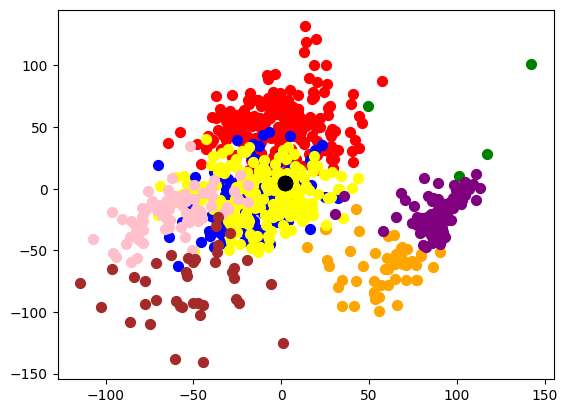

In [ ]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], s=50, c='orange')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1], s=50, c='red')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1], s=50, c='blue')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1], s=50, c='green')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1], s=50, c='yellow')
plt.scatter(x[y_pred==5,0],x[y_pred==5,1], s=50, c='pink')
plt.scatter(x[y_pred==6,0],x[y_pred==6,1], s=50, c='purple')
plt.scatter(x[y_pred==7,0],x[y_pred==7,1], s=50, c='brown')
plt.scatter(centers[:,0], centers[:,1], s=100, c='black')

In [ ]:
kmeans = KMeans(n_clusters=8)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([7, 5, 2, 2, 1, 5, 0, 6, 4, 5, 1, 3, 6, 7, 1, 4, 6, 3, 3, 5, 4, 6,
       6, 2, 3, 6, 2, 1, 1, 1, 1, 4, 3, 7, 5, 1, 3, 6, 5, 7, 3, 5, 5, 0,
       3, 4, 7, 2, 1, 6, 4, 5, 1, 5, 2, 2, 1, 5, 0, 6, 5, 6, 4, 6, 1, 2,
       6, 5, 3, 5, 0, 6, 5, 6, 4, 5, 4, 7, 5, 2, 1, 5, 1, 4, 7, 5, 1, 1,
       0, 1, 5, 2, 4, 7, 4, 5, 2, 4, 6, 1, 1, 3, 4, 0, 5, 3, 5, 2, 5, 6,
       7, 4, 6, 5, 1, 3, 3, 3, 4, 4, 6, 3, 5, 1, 5, 5, 5, 4, 3, 1, 2, 2,
       7, 1, 1, 0, 6, 1, 0, 2, 4, 5, 4, 0, 6, 2, 7, 4, 6, 5, 6, 5, 1, 4,
       6, 1, 4, 5, 5, 6, 7, 6, 3, 6, 6, 6, 2, 0, 6, 4, 3, 6, 1, 5, 4, 5,
       5, 5, 1, 3, 2, 3, 4, 6, 2, 6, 6, 6, 1, 5, 5, 3, 7, 1, 5, 4, 7, 4,
       5, 5, 6, 3, 3, 3, 0, 1, 7, 2, 5, 6, 6, 4, 5, 2, 5, 6, 1, 4, 6, 6,
       3, 6, 3, 3, 6, 4, 3, 5, 4, 6, 7, 1, 2, 7, 3, 6, 3, 2, 6, 3, 0, 1,
       5, 6, 6, 5, 3, 6, 1, 2, 1, 5, 6, 1, 5, 3, 7, 1, 5, 4, 1, 2, 6, 2,
       2, 2, 1, 1, 4, 3, 0, 1, 2, 7, 0, 5, 1, 1, 3, 4, 4, 1, 7, 5, 6, 4,
       4, 1, 0, 3, 3, 3, 7, 4, 1, 3, 4, 4, 6, 5, 5,

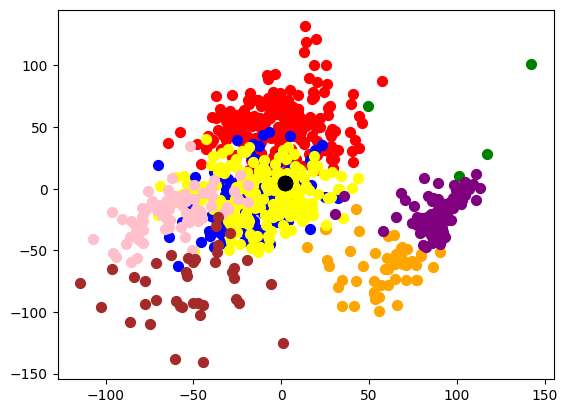

In [ ]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], s=50, c='orange')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1], s=50, c='red')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1], s=50, c='blue')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1], s=50, c='green')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1], s=50, c='yellow')
plt.scatter(x[y_pred==5,0],x[y_pred==5,1], s=50, c='pink')
plt.scatter(x[y_pred==6,0],x[y_pred==6,1], s=50, c='purple')
plt.scatter(x[y_pred==7,0],x[y_pred==7,1], s=50, c='brown')
plt.scatter(centers[:,0], centers[:,1], s=100, c='black')

try PCA 100

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
new_gene= pca.fit_transform(data1)
df = pd.DataFrame(data=new_gene)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-57.446987,-95.410981,74.301543,12.166781,-7.981830,-36.157572,-7.668539,19.951446,0.142187,-3.035023,...,-6.519708,8.662089,-5.515008,-8.208451,-2.758949,6.735555,-5.129926,-2.449292,4.715827,-1.103902
1,-16.919430,-0.732470,-64.072900,2.095308,25.426430,-27.784181,-16.132760,-17.031395,-22.023900,27.923353,...,8.041594,-0.272829,-3.166728,-1.567976,4.576688,1.859917,-1.393762,5.970870,2.231455,-1.339608
2,-70.345218,19.303327,20.488241,-48.102893,-24.437756,-17.462511,20.706785,-47.626835,-28.647767,12.785108,...,-4.222123,-0.173076,-7.174376,2.059803,0.076432,-2.096421,9.923301,5.082796,1.506604,-12.283752
3,-49.161591,9.227586,61.243770,-37.805744,-1.038889,-23.240006,-4.801045,-21.554813,-15.374989,12.881473,...,-5.543127,9.974937,0.126380,-6.440692,-2.023878,-3.130700,-1.323892,-2.882147,0.643607,-10.716341
4,-18.132534,51.327797,16.598116,17.699201,-26.389130,1.551574,-6.266098,12.336681,-4.233857,-28.804450,...,-6.539219,-0.744541,2.522253,7.171214,5.519695,-5.351049,0.435073,-2.064393,-4.233290,-7.647723


In [ ]:
from sklearn.cluster import KMeans
iner = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(df)
    iner.append(kmeans.inertia_)


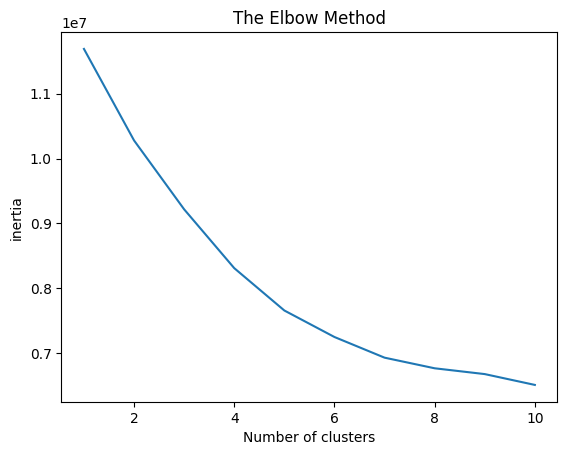

In [ ]:
plt.plot(range(1, 11), iner)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7)
y_pred = kmeans.fit_predict(df)
y_pred

array([5, 1, 3, 3, 6, 3, 4, 3, 2, 3, 6, 4, 3, 5, 6, 6, 1, 4, 4, 3, 6, 4,
       1, 6, 4, 1, 0, 6, 2, 2, 6, 6, 4, 5, 3, 6, 4, 1, 6, 5, 4, 3, 3, 4,
       4, 6, 5, 0, 6, 1, 6, 1, 2, 3, 0, 2, 6, 0, 4, 6, 1, 1, 6, 1, 3, 0,
       6, 3, 4, 2, 4, 6, 5, 1, 2, 1, 6, 5, 3, 0, 6, 3, 6, 6, 5, 3, 6, 6,
       4, 2, 3, 3, 6, 5, 6, 3, 0, 6, 3, 6, 6, 4, 6, 4, 1, 4, 1, 0, 1, 1,
       5, 6, 1, 3, 6, 4, 4, 4, 6, 6, 1, 4, 1, 6, 3, 3, 3, 6, 4, 2, 0, 2,
       0, 2, 6, 4, 1, 6, 4, 0, 6, 3, 6, 4, 1, 0, 5, 6, 1, 1, 1, 1, 6, 6,
       1, 6, 6, 3, 3, 1, 5, 1, 4, 6, 3, 1, 0, 4, 1, 6, 4, 1, 6, 1, 6, 5,
       6, 3, 6, 4, 0, 4, 6, 3, 3, 3, 1, 1, 6, 1, 1, 4, 1, 3, 1, 6, 5, 6,
       1, 1, 6, 4, 4, 4, 4, 3, 5, 3, 6, 1, 1, 6, 3, 6, 3, 6, 6, 6, 1, 6,
       4, 1, 4, 4, 1, 6, 4, 3, 6, 1, 5, 3, 0, 5, 4, 3, 4, 0, 2, 4, 4, 1,
       3, 1, 1, 1, 4, 6, 2, 0, 2, 3, 1, 6, 3, 4, 5, 3, 3, 6, 0, 0, 1, 0,
       0, 3, 1, 2, 6, 4, 4, 6, 0, 5, 4, 3, 6, 6, 4, 6, 2, 2, 5, 1, 1, 6,
       6, 6, 4, 4, 4, 4, 5, 6, 6, 4, 6, 6, 1, 3, 6,

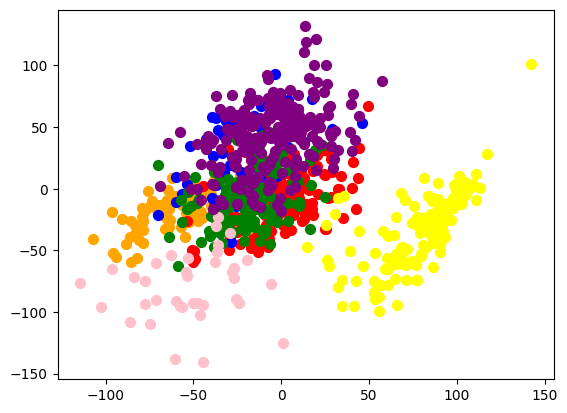

In [ ]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], s=50, c='orange')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1], s=50, c='red')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1], s=50, c='blue')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1], s=50, c='green')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1], s=50, c='yellow')
plt.scatter(x[y_pred==5,0],x[y_pred==5,1], s=50, c='pink')
plt.scatter(x[y_pred==6,0],x[y_pred==6,1], s=50, c='purple')
plt.scatter(x[y_pred==7,0],x[y_pred==7,1], s=50, c='brown')
#plt.scatter(centers[:,0], centers[:,1], s=100, c='black')

Now use DbScan for the same data

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [ ]:
eps_values = np.arange(.001, .1, 1)
min_samples_values = np.arange(2, 10, 1)
DBSCAN_params = {'eps': eps_values, 'min_samples': min_samples_values}
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)

create a heatmap

In [ ]:

df1 = df
eps  = .5
db = DBSCAN(eps=eps, min_samples=2).fit(df1)
df1['Label'] = db.fit_predict(df1)


In [ ]:
df1.head()

,0,1,Label
0,-57.446987,-95.410981,-1
1,-16.919430,-0.732471,-1
2,-70.345218,19.303327,-1
3,-49.161591,9.227586,-1
4,-18.132533,51.327797,-1


In [ ]:
import seaborn as sns
sns.scatterplot(x = df1[0], y = df1[1], hue = df1['Label'])
plt.show()

NameError: name 'df1' is not defined

DBSCAN does a very poor job of clustering this data

Perhaps the alpha value is too large?  We try a much smaller value of alpha, at .001.

value of eps is   0.8


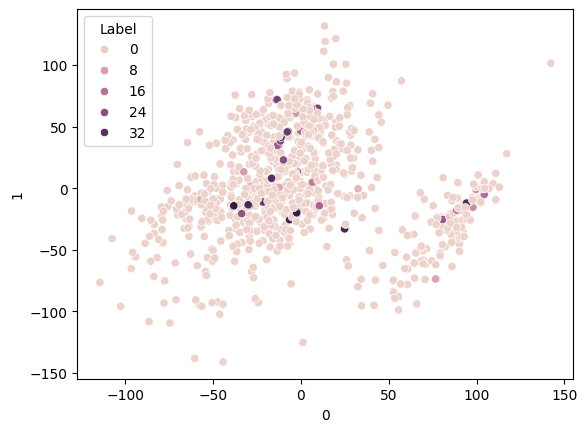

value of eps is   0.6


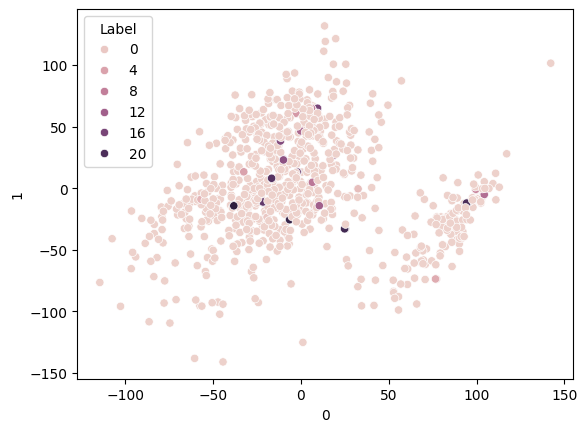

value of eps is   0.5


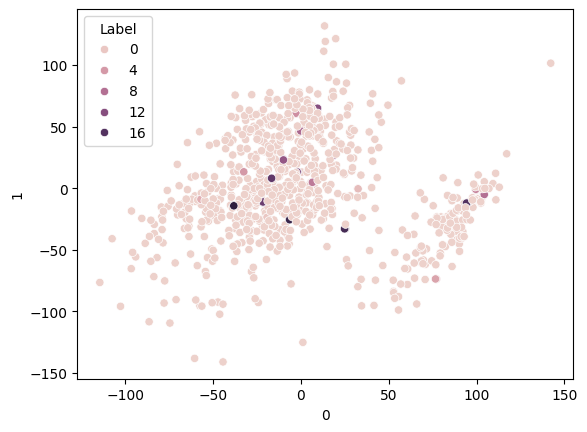

value of eps is   0.1


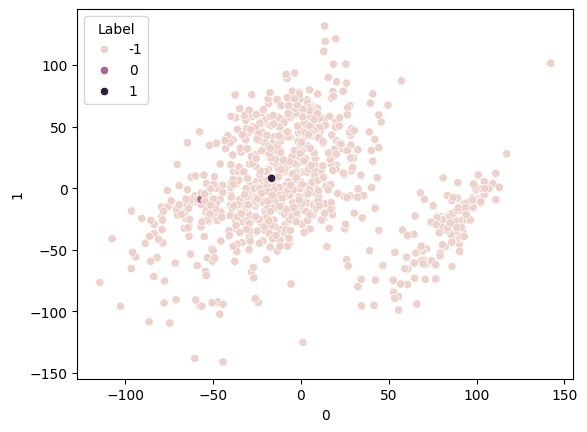

value of eps is   0.01


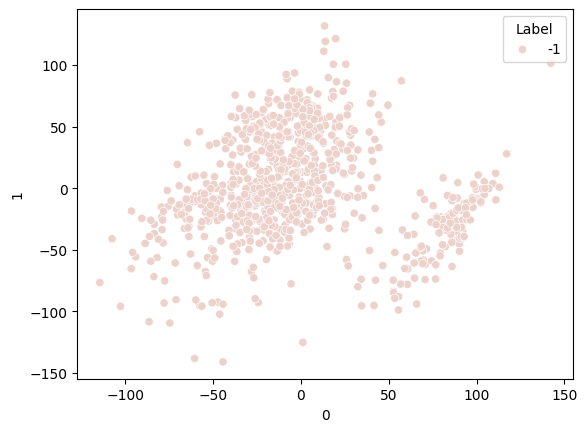

In [ ]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
new_gene= PCA.fit_transform(data1)
df = pd.DataFrame(data=new_gene)
epslist  = [.8, .6, .5, .1, .01]
for eps in epslist:
    df1 = df.copy()
    db = DBSCAN(eps=eps, min_samples=2).fit(df1)
    df1['Label'] = db.fit_predict(df1)
    print('value of eps is  ',eps  )
    sns.scatterplot(x = df1[0], y = df1[1], hue = df1['Label'])
    plt.show()


We pick alpha to be .5 and try changing the number of samples

value of min_samples is   1


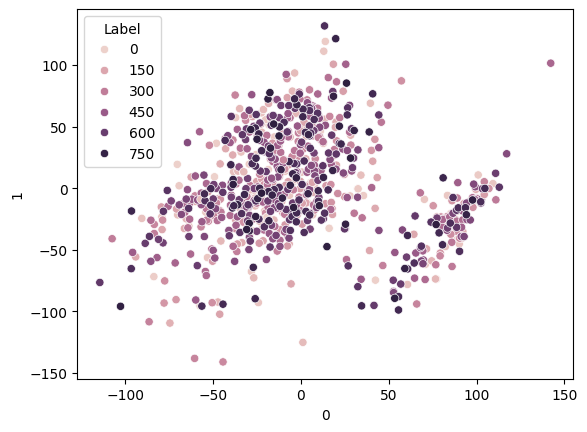

value of min_samples is   2


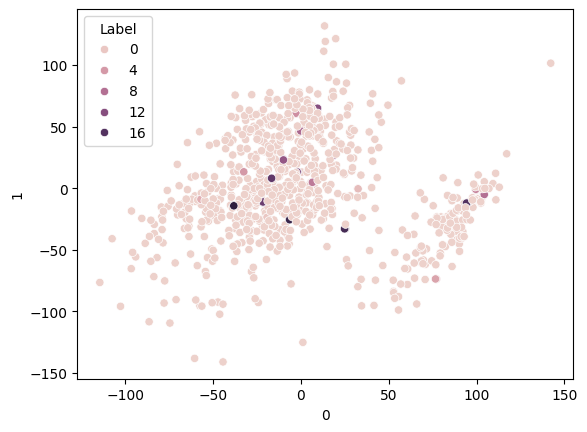

value of min_samples is   5


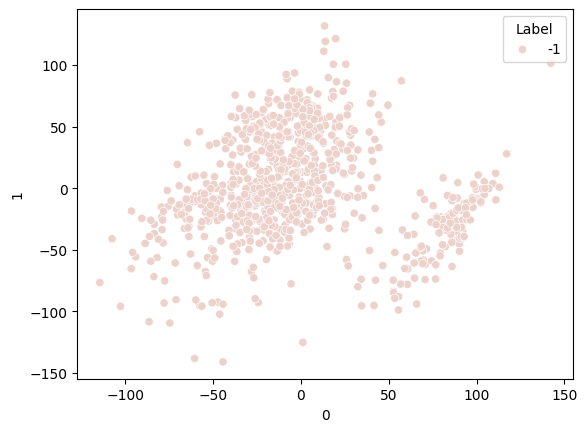

value of min_samples is   8


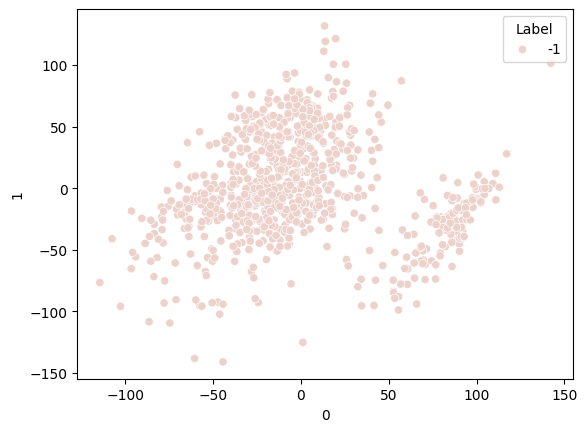

In [ ]:
min_sample_list  = [1, 2, 5, 8]
for min_samples in min_sample_list:
    df1 = df.copy()
    db = DBSCAN(eps=.5, min_samples= min_samples).fit(df1)
    df1['Label'] = db.fit_predict(df1)
    print('value of min_samples is  ',min_samples  )
    sns.scatterplot(x = df1[0], y = df1[1], hue = df1['Label'])
    plt.show()
